# Проект: Исследование стартапов

Автор: Коваленко Николай Евгеньевич <br>
Дата: 27.01.2025

## Введение

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


* Загрузите все данные по проекту.

In [199]:
df_acq=pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_car=pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_deg=pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
df_educ=pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_fund=pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_invest=pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
df_ppl=pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')


In [200]:
display(df_acq.columns)

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [201]:
display(df_car.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [202]:
display(df_deg.columns)

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [203]:
display(df_educ.columns)

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [204]:
display(df_fund.columns)

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [205]:
display(df_invest.columns)

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [206]:
display(df_ppl.columns)

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [207]:
#Приводим все столбцы к стилю snake case. Названия должны быть в нижнем регистре, а вместо пробелов — подчёркивания _.
df_car.columns = df_car.columns.str.replace('  ', '_')

In [208]:
display(df_car.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [210]:
display(df_acq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

In [211]:
display(df_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

None

In [212]:
display(df_deg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

In [213]:
display(df_educ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

In [214]:
display(df_fund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


None

In [215]:
display(df_invest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

In [216]:
display(df_ppl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

In [217]:
#Подсчет количества явных пропусков 
display(f'Количество явных дубликатов в df_acq {df_acq.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_acq.duplicated(keep="last").sum()/len(df_acq),3)}')
display(f'Количество явных дубликатов в df_car {df_car.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_car.duplicated(keep="last").sum()/len(df_car),3)}')
display(f'Количество явных дубликатов в df_deg {df_deg.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_deg.duplicated(keep="last").sum()/len(df_deg),3)}')
display(f'Количество явных дубликатов в df_educ {df_educ.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_educ.duplicated(keep="last").sum()/len(df_educ),3)}')
display(f'Количество явных дубликатов в df_fund {df_fund.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_fund.duplicated(keep="last").sum()/len(df_fund),3)}')
display(f'Количество явных дубликатов в df_invest {df_invest.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_invest.duplicated(keep="last").sum()/len(df_invest),3)}')
display(f'Количество явных дубликатов в df_ppl {df_ppl.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_ppl.duplicated(keep="last").sum()/len(df_ppl),3)}')

'Количество явных дубликатов в df_acq 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_car 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_deg 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_educ 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_fund 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_invest 0 и относительное количество явных дубликатов 0.0'

'Количество явных дубликатов в df_ppl 0 и относительное количество явных дубликатов 0.0'

**Выводы**: В датафрейме df_acq есть значительные пропуски по полю term_code и незначительные по полю acquired_at. 
 В датафрейме df_car есть значительные пропуски по многим полям доходящим до 75% от всей выборки по датафрейму. 
 В датафрейме df_deg есть значительные пропуски по полям degree_type и subject. В датафрейме df_educ все хорошо пропуски только по полю graduated_at что может быть обусловлено что не все закончили ВУЗ. В датафрейме df_educ есть значительные пропуским по полям. df_invest все хорошо, полные данные. В df_ppl по полям company_id и network_username есть значительные пропуски.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [221]:
display(df_acq['acquired_at'].unique())

array(['2007-05-30', '2007-07-01', '2007-05-01', ..., '2013-12-11',
       '2013-08-31', '2013-12-12'], dtype=object)

In [222]:
df_acq['acquired_at'] = pd.to_datetime(df_acq['acquired_at'], format='%Y-%m-%d')

In [223]:
display(df_acq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


None

In [224]:
df_car['founded_at'] = pd.to_datetime(df_car['founded_at'], format='%Y-%m-%d')
df_car['closed_at'] = pd.to_datetime(df_car['closed_at'], format='%Y-%m-%d')
df_car['funded_at'] = pd.to_datetime(df_car['funded_at'], format='%Y-%m-%d')

In [225]:
display(df_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

In [226]:
df_educ['graduated_at'] = pd.to_datetime(df_educ['graduated_at'], format='%Y-%m-%d')

In [227]:
display(df_educ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


None

In [228]:
df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], format='%Y-%m-%d')

In [229]:
display(df_fund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


None

**Выводы**: У нас достаточно большой объем данных, в котором полностью отсутствуют дубликаты. Часть датафреймов имеет пропуски, некоторые пропуски имеют естественную природу, другие характеризуются неполнотой данных. По-моему мнению имеющиеся данные вполне пригодны для проведения анализа.  

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [233]:
df_car['funded_year']=df_car['funded_at'].dt.year

In [234]:
car_group=df_car.groupby('funded_year').agg({'raised_amount':['median','count']})

In [235]:
# Переименование столбцов для удобства
car_group.columns = ['median_funded', 'total_funded']

# Фильтрация по количеству > 50
filtered_df = car_group.query("total_funded > 50").reset_index()

display(filtered_df)

,funded_year,median_funded,total_funded
0,1999.0,2000000.0,76
1,2000.0,4200000.0,125
2,2001.0,3000000.0,96
3,2002.0,4200000.0,116
4,2003.0,3000000.0,159
5,2004.0,5000000.0,291
6,2005.0,5500000.0,1633
7,2006.0,5000000.0,2436
8,2007.0,3973320.0,3279
9,2008.0,3110000.0,3774


In [236]:
display(filtered_df)

,funded_year,median_funded,total_funded
0,1999.0,2000000.0,76
1,2000.0,4200000.0,125
2,2001.0,3000000.0,96
3,2002.0,4200000.0,116
4,2003.0,3000000.0,159
5,2004.0,5000000.0,291
6,2005.0,5500000.0,1633
7,2006.0,5000000.0,2436
8,2007.0,3973320.0,3279
9,2008.0,3110000.0,3774


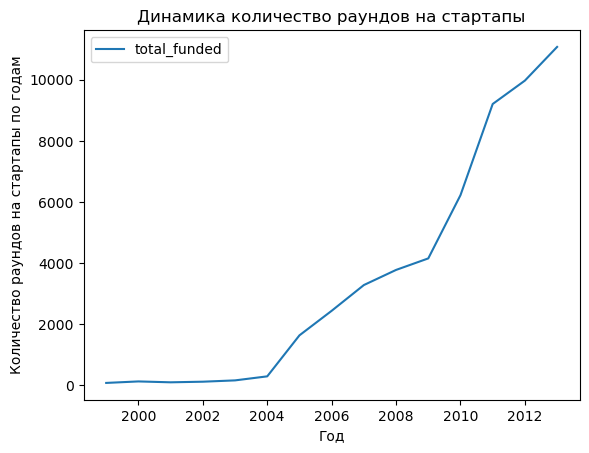

In [237]:
# Постройте график с помощью метода plot()

filtered_df.plot(kind='line', x='funded_year', y='total_funded')

# Настраиваем оси
plt.title('Динамика количество раундов на стартапы')
plt.xlabel('Год')
plt.ylabel('Количество раундов на стартапы по годам')

# Измените название осей и название графика
plt.show()

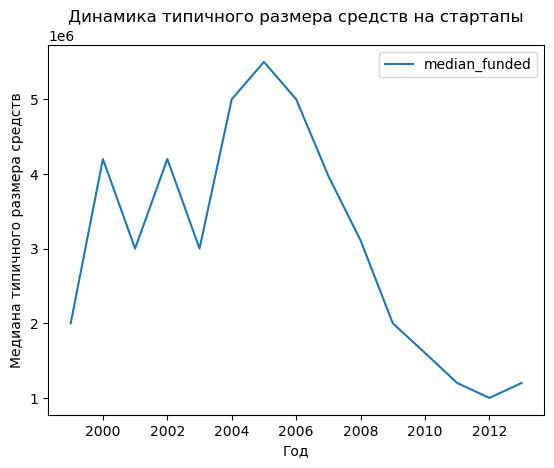

In [238]:
# Постройте график с помощью метода plot()

filtered_df.plot(kind='line', x='funded_year', y='median_funded')

# Настраиваем оси
plt.title('Динамика типичного размера средств на стартапы')
plt.xlabel('Год')
plt.ylabel('Медиана типичного размера средств')

# Измените название осей и название графика
plt.show()

**Динамика количества раундов на стартапы** характеризуется тем от года к году происходит сначала плавный рост, затем практически взрывной рост в конце 0-х. <br> **Динамика типичного размера средств на стартапы** В 2005 году типичный размер средств бал максимальным и составлял 5,5 млн долларов. В 2013 году типичный размер был 120 тыс долларов и было подсчитано максимальное количество раундов 11 072. По трендам до 2007 происходил рост привлеченных средств на стартапы, достигнув пика произошло снижение до 2012 года.  


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [241]:
# Подсчитываем долю строк с пропусками
df_educ.isna().sum() / df_educ.shape[0]

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [242]:
# Подсчитываем долю строк с пропусками
df_ppl.isna().sum() / df_ppl.shape[0]

id                  0.000000
first_name          0.000040
last_name           0.000018
company_id          0.847315
network_username    0.828560
dtype: float64

In [243]:
company_sizes = df_ppl.groupby('company_id')['id'].count().reset_index()

Было взято предложение  эксперта по разбиению стартапа в связи с количеством сотрудников от 1 до 8, 
от 9 до 15, от 16 до 35, от 36 до 70 и 70 и больше, максимум сотрудников был 240.
https://rajchoudhury.com/2013/06/26/start-up-stages-based-on-number-of-employees/

In [245]:
company_sizes['types_of_companies'] = pd.cut(company_sizes['id'],
                            bins=[0, 9, 16,36, 70, 250],
                            labels=['tiny', 'small', 'medium', 'upper_medium', 'large'])

In [246]:
company_sizes['types_of_companies'].value_counts()

types_of_companies
tiny            22777
small             103
medium             30
upper_medium        8
large               4
Name: count, dtype: int64

In [247]:
display(company_sizes)

,company_id,id,types_of_companies
0,1.0,2,tiny
1,2.0,1,tiny
2,3.0,3,tiny
3,4.0,13,small
4,5.0,61,upper_medium
...,...,...,...
22917,285897.0,2,tiny
22918,285953.0,1,tiny
22919,285972.0,2,tiny
22920,285996.0,1,tiny


In [248]:
df1=df_ppl.merge(company_sizes, how='left', on='company_id')

In [249]:
df_full=df1.merge(df_educ, how='left', left_on='id_x', right_on='person_id')

In [250]:
display(df_full)

,id_x,first_name,last_name,company_id,network_username,id_y,types_of_companies,id,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,61.0,upper_medium,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,10.0,small,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3.0,tiny,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,2.0,tiny,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,1.0,tiny,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,1.0,tiny,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaN,NaN,NaT


In [251]:
df_full.shape

(267694, 11)

In [252]:
df_all=df_full.merge(df_deg, how='outer', on='id')

In [253]:
#Подсчитаем количество специальностей на которых нет людей из df_ppl, их в итоге полуилось 554
df_all[df_all.id_x.isna()].count()

id_x                    0
first_name              0
last_name               0
company_id              0
network_username        0
id_y                    0
types_of_companies      0
id                    554
person_id               0
instituition            0
graduated_at            0
object_id             554
degree_type           506
subject               408
dtype: int64

In [254]:
df_all.shape

(268248, 14)

In [255]:
df_all.head()

,id_x,first_name,last_name,company_id,network_username,id_y,types_of_companies,id,person_id,instituition,graduated_at,object_id,degree_type,subject
0,6117.0,Maurice,Rompre,2430.0,NaN,1.0,tiny,1.0,6117.0,NaN,NaT,p:6117,MBA,NaN
1,6136.0,John,Green,2454.0,NaN,3.0,tiny,2.0,6136.0,"Washington University, St. Louis",1990-01-01,p:6136,BA,"English, French"
2,6136.0,John,Green,2454.0,NaN,3.0,tiny,3.0,6136.0,Boston University,1992-01-01,p:6136,MS,Mass Communication
3,6005.0,Sridhar,Gundaiah,2360.0,NaN,1.0,tiny,4.0,6005.0,University of Greenwich,2006-01-01,p:6005,MS,Internet Technology
4,5832.0,David,Peters,2033.0,NaN,2.0,tiny,5.0,5832.0,Rice University,NaT,p:5832,BCS,"Computer Science, Psychology"


In [256]:
# Подсчитываем долю null значений в столбце 'Образование' для каждого типа компании
null_counts = df_all['instituition'].isna().groupby(df_all['types_of_companies']).sum()
total_counts = df_all['types_of_companies'].value_counts()
doly_null = null_counts / total_counts

# Вывод результата
display(doly_null)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13028\418704179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_counts = df_all['instituition'].isna().groupby(df_all['types_of_companies']).sum()


types_of_companies
tiny            0.369581
small           0.352761
medium          0.283938
upper_medium    0.202401
large           0.185556
dtype: float64

С увеличением в компании количества сотрудников доля сотрудников без высшего образования снижается с 36,9% до 18,55%. По id можно связать education c degree

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [259]:
# Уникальные значения каждого столбца
unique_values_col1 = set(df_car['network_username'])
unique_values_col2 = set(df_fund['network_username'])
unique_values_col3 = set(df_ppl['network_username'])

# Пересечение уникальных значений
intersection = unique_values_col1.intersection(unique_values_col2)
intersection2 = unique_values_col1.intersection(unique_values_col3)
intersection3 = unique_values_col2.intersection(unique_values_col3)
# Количество пересекающихся значений
num_intersecting = len(intersection)
num_intersecting2 = len(intersection2)
num_intersecting3 = len(intersection3)
# Общее количество уникальных значений в обоих столбцах
total_unique = len(unique_values_col1) + len(unique_values_col2)
total_unique2 = len(unique_values_col1) + len(unique_values_col3)
total_unique3 = len(unique_values_col2) + len(unique_values_col3)
# Процент повторяющихся значений
percent_repeating = num_intersecting / total_unique * 100
percent_repeating2 = num_intersecting2 / total_unique2 * 100
percent_repeating3 = num_intersecting3 / total_unique3 * 100
print(f'Процент повторяющихся значений car и fund: {percent_repeating:.2f}%')
print(f'Процент повторяющихся значений car и ppl: {percent_repeating2:.2f}%')
print(f'Процент повторяющихся значений fund и ppl: {percent_repeating3:.2f}%')

Процент повторяющихся значений car и fund: 0.09%
Процент повторяющихся значений car и ppl: 1.86%
Процент повторяющихся значений fund и ppl: 0.20%


**Вывод:** <br >По-моему мнению процент совпадающих значений по столбцу network_username крайне мал менее 2% совпадающих значений, чтобы его использовать для merge.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [262]:
df_car['raised_amount']=pd.to_numeric(df_car['raised_amount'])
df_car['pre_money_valuation']=pd.to_numeric(df_car['pre_money_valuation'])
df_car['participants']=pd.to_numeric(df_car['participants'])

In [263]:
df_car.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_year'],
      dtype='object')

In [264]:
df_comp=df_car[['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].copy()

In [265]:
df_comp.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [266]:
df_round=df_car[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_year']].copy()

In [267]:
#Подсчет количества явных пропусков 
display(f'Количество явных дубликатов в df_comp {df_comp.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_comp.duplicated(keep="last").sum()/len(df_comp),3)}')
display(f'Количество явных дубликатов в df_round {df_round.duplicated(keep="last").sum()} и относительное количество явных дубликатов {round(df_round.duplicated(keep="last").sum()/len(df_round),3)}')

'Количество явных дубликатов в df_comp 21220 и относительное количество явных дубликатов 0.097'

'Количество явных дубликатов в df_round 164845 и относительное количество явных дубликатов 0.757'

In [268]:
#Удаление явных дубликатов
df_comp.drop_duplicates(inplace=True)
df_round.drop_duplicates(inplace=True)

In [269]:
display(df_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

None

In [270]:
display(df_round.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_year          52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


None

**Вывод**: По новому датасету компании была удалена информации по нескольким раундам финансирования и собран в отдельный датафрейм компании с информацией их характеризующий. 
<br> По раундам есть полная информация только по 1/4 из них и она представлена в таблице. Такой большой объемп пропусков без потери информации не восполнить.    


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [274]:
# Формируем датасет
df_res=df_comp[(df_comp['funding_rounds']>0)|(df_comp['investment_rounds']>0)|(df_comp['status']=='acquired')].copy()


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

[Text(0.5, 1.0, 'Ящик с усами по finding_total'),
 Text(0.5, 0, 'Значения funding_total')]

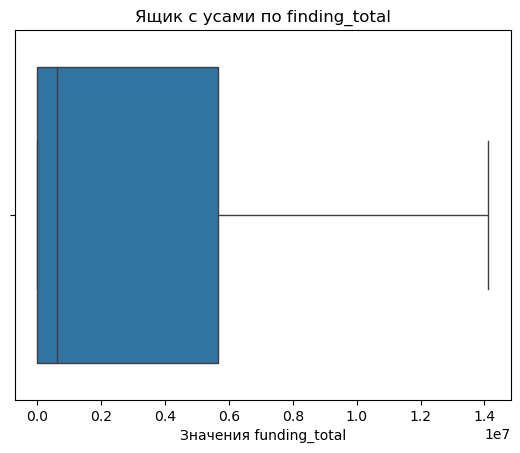

In [276]:
sns.boxplot(x=df_res["funding_total"], showfliers = False).set(title='Ящик с усами по finding_total', xlabel='Значения funding_total')

In [277]:
df_res.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,company_ID,founded_at,closed_at,investment_rounds,funding_rounds,funding_total,milestones
count,40747.00000,27807.00000,2128.00000,40747.00000,40747.00000,40747.00000,40747.00000
mean,110555.89614,.5f,.5f,0.15083,1.29153,10135609.63673,0.80315
min,1.00000,.5f,.5f,0.00000,0.00000,0.00000,0.00000
25%,33863.50000,.5f,.5f,0.00000,1.00000,0.00000,0.00000
50%,69583.00000,.5f,.5f,0.00000,1.00000,600000.00000,1.00000
75%,184744.50000,.5f,.5f,0.00000,2.00000,5650650.00000,1.00000
max,286215.00000,.5f,.5f,478.00000,15.00000,5700000000.00000,9.00000
std,90388.07011,nan,nan,3.12329,1.26460,56464359.97726,1.00343


In [278]:
df_res[(df_res['funding_total']>0)&(df_res['funding_total']<=df_res['funding_total'].quantile(0.95))].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,company_ID,founded_at,closed_at,investment_rounds,funding_rounds,funding_total,milestones
count,25837.00000,20083.00000,1696.00000,25837.00000,25837.00000,25837.00000,25837.00000
mean,119025.71030,.5f,.5f,0.06166,1.60065,6222841.65995,0.85056
min,1.00000,.5f,.5f,0.00000,1.00000,291.00000,0.00000
25%,39196.00000,.5f,.5f,0.00000,1.00000,495000.00000,0.00000
50%,78601.00000,.5f,.5f,0.00000,1.00000,2000000.00000,1.00000
75%,197021.00000,.5f,.5f,0.00000,2.00000,8000000.00000,1.00000
max,286215.00000,.5f,.5f,478.00000,15.00000,43500000.00000,9.00000
std,92307.02103,nan,nan,3.66278,1.02812,9040601.98468,1.00085


[Text(0.5, 1.0, 'Гистограмма funding_total'),
 Text(0.5, 0, 'Значения funding_total'),
 Text(0, 0.5, 'Количество стартапов')]

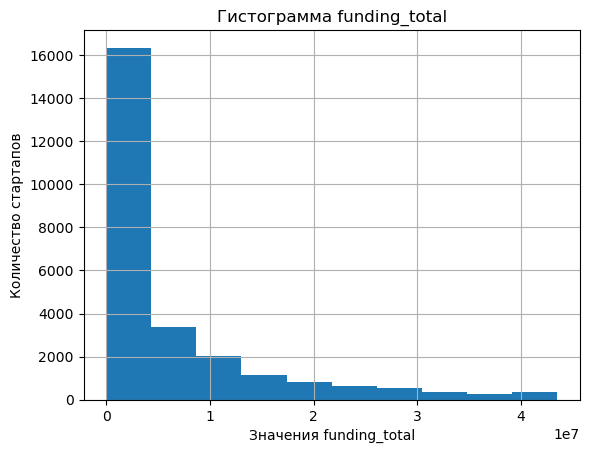

In [279]:
df_res[(df_res['funding_total']>0)&(df_res['funding_total']<=df_res['funding_total'].quantile(0.95))].funding_total.hist().set(title='Гистограмма funding_total', xlabel='Значения funding_total', ylabel='Количество стартапов')

**Вывод** Визуальным анализом пришли, что значения по funding_total брать в интервале от (0, 15 000 000). Получаются достаточно ровные значения на 25% квартиле 485 000, 50% квартиле 2 000 000, 75% квартиле 8 000 000. При этом хорошо выравнивалось среднее-медиана, в исходном датасете 10 135 609- 600 000 , а в отредактированном 6 222 841 - 2 000 000  


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [282]:
df_cheap=df_res.merge(df_acq, left_on='company_ID', right_on='acquired_company_id', how='left')

In [283]:
df_dollar=df_cheap[((df_cheap['price_amount']==0)&(df_cheap['funding_total']>0))|((df_cheap['price_amount']==1)&(df_cheap['funding_total']>0))]

In [284]:
df_dollar.shape

(1618, 19)

In [285]:
''' Вычисление '''
# IQR
# Вычисляем 25% и 75% квантиль распределения для расчета верхней и нижней границы.
Q1 = df_dollar["funding_total"].quantile(0.25)
Q3 = df_dollar["funding_total"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [286]:
display(f'Нижняя граница ниже нее выбросы {lower}')
display(f'Верхняя граница выше нее выбросы {upper}')

'Нижняя граница ниже нее выбросы -18250000.0'

'Верхняя граница выше нее выбросы 35750000.0'

In [287]:
# Объединяем значения в один
combined_list=[]
combined_list.append(lower)
combined_list.append(upper)

# Создаем датафрейм с одним столбцом
df_c = pd.DataFrame({'Combined': combined_list})

In [288]:
df_c["Combined"].apply(lambda x: stats.percentileofscore(df_dollar["funding_total"], x, kind = 'weak'))

0     0.00000
1    90.91471
Name: Combined, dtype: float64

**Вывод**: В качестве меры на отсечение выбросов были выбраны границы межквартильного размаха верхняя и нижняя граница, после для них было вычислено значение квартиля, которому они соотвествуют нижняя 0 квартилю, верхняя 90,91 квартилю.  


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [291]:
df_top=df_cheap.groupby('category_code').agg({'price_amount':'median'})

In [292]:
df_top['price_amount']=df_top['price_amount']/1000000

In [293]:
df_top=df_top.rename(columns={'price_amount':'price_amount_millions'})

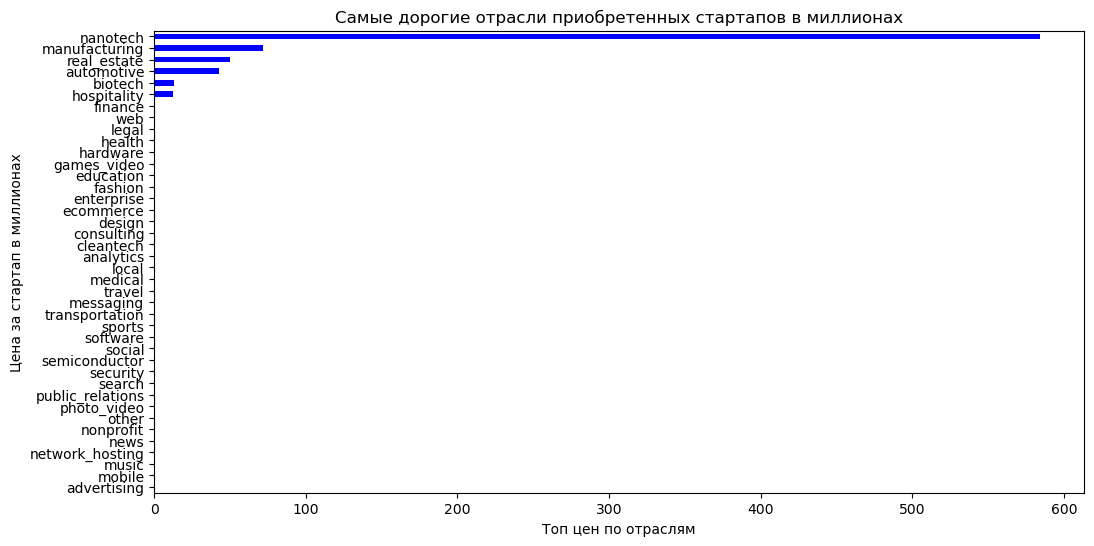

In [294]:
#Построим график стартапов с наибольшими ценами
df_top.dropna().sort_values(by='price_amount_millions').plot(kind='barh', legend=False,
                title='Самые дорогие отрасли приобретенных стартапов в миллионах',
                ylabel='Цена за стартап в миллионах',
                xlabel='Топ цен по отраслям',
                rot=0,
                figsize=(12,6),                                             
                color='blue')

# Отображаем график
plt.show()

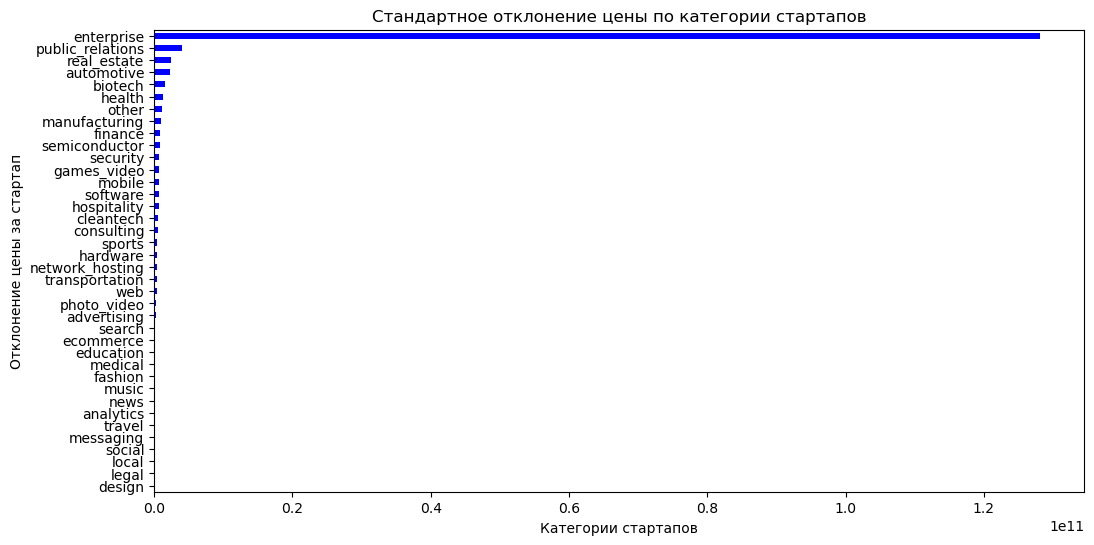

In [295]:
df_agg_gr=df_cheap.groupby('category_code').agg({'price_amount':'std'})
df_agg_gr.dropna().sort_values(by='price_amount').plot(kind='barh', legend=False,
                title='Стандартное отклонение цены по категории стартапов',
                ylabel='Отклонение цены за стартап',
                xlabel='Категории стартапов',
                rot=0,
                figsize=(12,6),
                color='blue')

# Отображаем график
plt.show()

**Вывод**: Решили взять топ из наиболее дорогих приобретенных стартапов, чтобы иметь представление о самых из самых и можно было визуализировать их на графике. <br>
Посчитали также старндартное отклонение по категориям стартапов, выделяется на общем фоне категория enterprise, топ-3 также замыкают public relations и automotive.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [298]:
# Подсчитываем количество раундов для каждой компании
counts = df_round['company_id'].value_counts()

# Выбираем только те компании, у которых больше одного раунда
companies_with_more_than_one_round = counts[counts >= 1].index

# Фильтруем датафрейм company по выбранным компаниям
filtered_df_company = df_comp.query("company_ID in @companies_with_more_than_one_round")

In [299]:
display(filtered_df_company.groupby('status').agg({'funding_rounds':'mean'}))

,funding_rounds
status,
acquired,1.896645
closed,1.383437
ipo,2.526531
operating,1.642359


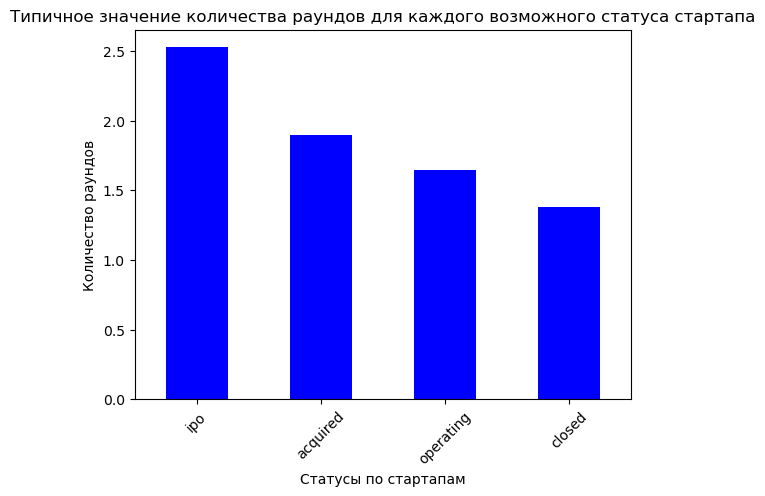

In [300]:
df_agg=filtered_df_company.groupby('status').agg({'funding_rounds':'mean'})

df_agg.sort_values(by='funding_rounds', ascending=False).plot.bar(legend=False,
                title='Типичное значение количества раундов для каждого возможного статуса стартапа',
                ylabel='Количество раундов',
                xlabel='Статусы по стартапам',
                rot=45,
                color='blue')

# Отображаем график
plt.show()

**Вывод**: Наибольшее количество раундов финансирования проходит по статусу ipo 2,52, наименьше 1,32 по closed.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

**Что было сделано:** 
- Загружены данные
- Проверены на явные дубликаты
- Преобразованы данные характеризующиеся время
- Выделен год финансирования
- Произведен подсчет по уровню образования в зависимости от занятости стартапа
- Произведен анализ по поводу объединения столбцов по колонке network_username
- Разбит на два датасета company_and_rounds
- Исследованы выбросы и предложены границы по которым следует расссматривать уровни финансирования стартапов
- Построена верхняя и нижняя граница финансирования для стартапов проданных за 0 или 1 доллар при ненулевом финансировании
- Выделены топ-20 компаний по цене приобретения и отрасли с наибольшим разбросом цены за стартап
- Проанализирована сколько раундов требуется для финансирования в завимсимости о статуса проекта

**Вывод**: Есть значительное расслоение между стартапами как по стоимости приобретения, так и по общему финаснированию. По трендам до 2007 происходил рост привлеченных средств на стартапы, достигнув пика перед мировым финансовым кризисом 2008 происходит снижение до 2012 года. Данные подтверждают те процессы, которые имели место в то время, единственная озабоченность возникает в полноте отдельных датафреймов в связи с значительными пропусками.
